# Базовая модель

## Описание модели

В модели присутствуют два вида агентов – **n** продавцов и **m** покупателей. В модели рассматривается только один вид товара, все продавцы хотят его продать, все покупатели его купить. 

## Продавцы

У каждого продавца **s** определено минимальное значение цены **s.min_price**, за которую он готов продать товар. Ниже этой цены продавцу невыгодно продавать товар. У разных продавцов значение **s.min_price** может быть разным. У каждого продавца значение **s.min_price** определяется в начале процесса моделирование как случайное число, равномерно распределенное на отрезке **[saller_min, saller_max]**. Величины **saller_min** и **saller_max** одинаковы для всех продавцов и являются параметрами модели.

Также у каждого продавца **s** есть значение ожидаемой цены продажи **s.expect_price**, которая всегда больше или равна, чем **s.min_price**. Изначально **s.expect_price** равно **saller_max**, но в дальнейшем может уменьшаться или увеличиваться на величину **saller_delta**, одинаковую для всех продавцов и являющейся параметром модели. Изменение **s.expect_price** происходит после взаимодействия данного продавца **s** с покупателем. Правила данного изменения будут описаны ниже. 


## Покупатели

У каждого покупателя **с** определено максимальное значение цены **c.max_price**, за которую он готов купить товар. Выше этой цены покупателю невыгодно покупать товар. У разных покупателей значение **c.max_price** может быть разным. У каждого покупателя значение **c.min_price** определяется в начале процесса моделирования как случайное число, равномерно распределенное на отрезке **[consumer_min ,consumer_max]**. Величины **consumer_min** и **consumer_max** одинаковы для всех продавцов и являются параметрами модели.
Также у каждого покупателя есть значение ожидаемой цены продажи **c.expect_price**, которая всегда меньше или равна, чем **c.max_price**. Изначально **c.expect_price** равно **0**, но в дальнейшем может уменьшаться или увеличиваться на величину **consumer_delta**, одинаковую для всех покупателей и являющейся параметром модели. Изменение **c.expect_price** происходит после взаимодействия данного покупателя c продавцом. Правила данного изменения будут описаны ниже. 


## Взаимодействие

На каждом шаге моделирования случайным равновероятным образом выбирается один продавец **s** и один покупатель **c**. Между ними происходит попытка заключения сделки. 

Если **s.expect_price** меньше или равно **c.expect_price** покупателя, то: 
1. сделка происходит,
2. **s.expect_price** увеличивается на **s.delta**,
3. **c.expect_price** уменьшается на **c.delta**.
Такое поведение объясняется тем, что текущие ожидания от сделки удовлетворяют ожиданиям как продавца, так и покупателя. Реальная стоимость купли-продажи может быть определена как **(s.expect_price + c.expect_price) / 2**, однако в данной модели эта величина никак не учитывается. 

При этом продавец считает, что если он сейчас продал товар за стоимость как минимум **s.expect_price**, то в дальнейшем он может его продать немного дороже и **s.expect_price** можно немного увеличить.

А покупатель считает, что он купил сейчас товар за стоимость не более **c.expect_price**, то в дальнейшем он может покупать товар немного дешевле и **c.expect_price** можно немного уменьшить.

Если **s.expect_price** больше, чем **c.expect_price** покупателя, то:
1. сделка не происходит,
2. **s.expect_price** уменьшается на **s.delta**,
3. **c.expect_price** увеличивается на **c.delta**.
Такое поведение объясняется тем, что текущие ожидания от сделки не удовлетворяют ожиданиям как продавца, так и покупателя.

При этом продавец считает, что если он сейчас не продал товар за стоимость **s.expect_price**, то для продажи в следующий раз **s.expect_price** надо немного уменьшить.

А покупатель считает, что если он сейчас не смог купить товар за **c.expect_price**, то для покупки в следующий раз **c.expect_price** надо немного увеличить.


## Анализ


Модель на каждом такте должна учитывать:
1. Среднее значение **s.expect_price** по всем продавцам,
2. Минимальное значение **s.expect_price** по всем продавцам,
3. Среднее значение **с.expect_price** по всем покупателям,
4. Максимальное значение **с.expect_price** по всем покупателям,
5. Долю состоявшихся сделок на данный момент.

## Параметры модели


* **n** - количество продавцов, 
* **m** - количество покупателей,
* **[saller_min, saller_max]** – интервал, из которого определяется **s.min_price** для каждого продавца,
* **saller_delta** - величина изменения ожидаемой цены у покупателя,
* **[consumer_min ,consumer_max]** – интервал, из которого определяется **с.max_price** для каждого покупателя,
* **consumer_delta** - величина изменения ожидаемой цены у продавца.


## Технические требования 


* Модель должна быть построена в объектно-ориентированном подходе. Каждый вид агента описывается определенным классом, а каждый агент, соответственно, является объектом данного класса.
* Модель также является классом, в конструктор которого передаются все параметры модели.
* Модель должна иметь метод **run(n)**, который моделирует **n** последующих шагов модели 

## Построение графиков

* Модель должна иметь метод **plot_dynamics(i,j)**, который строит графики анализа поведения моделей на интервале шагов с **i** по **j**.
* Модель должна иметь метод **plot_supply_and_demand(i)**, который строит графики спроса и предложения в момент времени **i**.

## Построение графа (схемы)


Модель должна иметь метод **plot_graph(i, j)**, который строит и визуализирует граф, в котором вершинами являются продавцы и покупатели, а ребра обозначают количество совершенных или не совершенных между ними сделок в периоде с **i** по **j**. Покупатели обозначены синим цветом, продавцы обозначены пурпурным. Зеленые ребра обозначают удачные сделки между продавцом и покупателем. Красные ребра обозначают неудачные сделки. Толщина ребра показывает количество сделок между данными продавцом и покупателем относительно общего количества сделок.

# Реализация базовой модели

## Подключение библиотек

In [ ]:
# !pip install tqdm

In [ ]:
# !pip install graphviz

In [ ]:
import random
import matplotlib.pyplot as plt
from tqdm import trange # Модуль для визуализации прогресс-бара при запуске модели
import graphviz # Модуль для визуализации графов

## Реализация базовой модели

In [164]:
def mean(lst):
    return sum(lst)/len(lst)


class Model:
    def __init__(self, num_of_consumers, num_of_sellers, consumer_min, consumer_max, consumer_delta, seller_min, seller_max, seller_delta):
        '''
            Конструктор класса.

            num_of_consumers -- количество покупателей
            num_of_sellers -- количество продавцов
            consumer_min -- минимальное возможное значение max_price для покупателей
            consumer_max -- максимально возможное значение max_price для покупателей
            consumer_delta -- шаг изменения expect_price для покупателей
            seller_min -- минимальное возможное значение min_price для продавцов
            seller_max -- максимально возможное значение min_price для продавцов
            seller_delta -- шаг изменения expect_price для продавцов

        '''
        self.num_of_consumers = num_of_consumers
        self.num_of_sellers = num_of_sellers

        # Список всех покупателей модели
        self.consumers = [Consumer(consumer_min, consumer_max, consumer_delta) for _ in range(num_of_consumers)]
        
        # Список всех продавцов модели
        self.sellers = [Seller(seller_min, seller_max, seller_delta) for _ in range(num_of_sellers)]
        
        # Список списков. На позиции i находится список текущих значений expect_price для всех покупателей на шаге i.
        self.consumers_expect_price = []
        
        # Список списков. На позиции i находится список текущих значений expect_price для всех продавцов на шаге i.
        self.sellers_expect_price = []

        # Список результатов сделок. На позиции i находится словарь вида
        # { 
        #     'consumer_id' : consumer_id,
        #     'seller_id' : seller_id
        #     'result' : result
        # }
        # где result = 1, если на i шаге была успешная сделка, иначе 0.
        self.deals_results = []


    def deal(self, consumer_id, seller_id):
        '''
            Моделирование сделки между покупателем с индексом consumer_id и продавцом с индексом seller_id

            consumer_id -- индекс покупателя в массиве self.consumers
            seller_id -- индекс продавца в массиве self.sellers
        '''
        
        # Сохраняем текущие значения expect_price покупателей
        self.consumers_expect_price.append([consumer.expect_price for consumer in self.consumers])
        
        # Сохраняем текущие значения expect_price продавцов
        self.sellers_expect_price.append([seller.expect_price for seller in self.sellers])
        
        if self.sellers[seller_id].expect_price <= self.consumers[consumer_id].expect_price:
            # Сделка состоялась
            
            # Записываем факт состоявшейся сделки
            self.deals_results.append({
                'consumer_id' : consumer_id,
                'seller_id' : seller_id,
                'result' : 1
                })

            # Данный покупатель решает уменьшить у себя expect_price
            self.consumers[consumer_id].decrease_expect_price()

            # Данный продавец решает увеличить у себя expect_price
            self.sellers[seller_id].increase_expect_price()
            
        else:
            # Сделка не состоялась
            
            # Записываем факт несостоявшейся сделки
            self.deals_results.append({
                'consumer_id' : consumer_id,
                'seller_id' : seller_id,
                'result' : 0
                })

            # Данный покупатель решает увеличить у себя expect_price
            self.sellers[seller_id].decrease_expect_price()

            # Данный продавец решает уменьшить у себя expect_price
            self.consumers[consumer_id].increase_expect_price()
            

    def run(self, num_of_steps):
        '''
            Запуск num_of_steps шагов модели
        '''
        for _ in trange(num_of_steps+1): # trange вместо range для визуализации прогресс-бара
            
            # Выбираем индекс покупателя случайным образом
            consumer_id = random.randrange(0, self.num_of_consumers)
            
            # Выбираем индекс продавца случайным образом
            seller_id = random.randrange(0, self.num_of_sellers)
            
            # Моделируем сделку
            self.deal(consumer_id, seller_id)
            

    def plot_dynamics(self, start, end):
        '''
            Визуализация динамики модели на шагах от start до end включительно
        '''

        # Формируем два графика по горизонтали
        fig = plt.figure(figsize = (20,5))
        ax1 = fig.add_subplot(1,2,1)
        ax2 = fig.add_subplot(1,2,2)
        
        # Список точек по оси шагов
        steps_range = list(range(start, end+1))
        ax1.title.set_text("Динамика ожидаемых цен")

        # Среднее значение expect_price среди покупателей
        ax1.plot(steps_range, list(map(mean, self.consumers_expect_price[start : end+1])), color='g', label = "Средняя ожидаемая цена покупателей")
        
        # Максимальное значение expect_price среди покупателей
        ax1.plot(steps_range, list(map(max, self.consumers_expect_price[start : end+1])), color='g', linestyle='--', label = "Максимальная ожидаемая цена покупателей")
        
        # Среднее значение expect_price среди продавцов
        ax1.plot(steps_range, list(map(mean, self.sellers_expect_price[start : end+1])), color='r', label = "Средняя ожидаемая цена продавцов")
        
        # Минимальное значение expect_price среди продавцов
        ax1.plot(steps_range, list(map(min, self.sellers_expect_price[start : end+1])), color='r', linestyle='--', label = "Минимальная ожидаемая цена продавцов")
        # ax1.plot(steps_range, list(map(max, self.sellers_expect_price[start : end+1])), color='b', linestyle='--', label = "Минимальная ожидаемая цена продавцов")

        ax1.legend()
        ax1.set_xlabel("Шаг")
        ax1.set_ylabel("У.Е.")


        # Находим долю успешных сделок на отрезке от start до end включительно
        deals_sum = [0]
        for i in range(start, end+1):
            deals_sum.append(deals_sum[-1] + self.deals_results[i]['result'])
        deals_fraction = [deals_sum[i] / i for i in range(1, end - start + 2)]
        ax2.title.set_text("Динамика доли сделок")
        ax2.plot(steps_range, deals_fraction, label="Доля сделок")
        ax2.legend()
        ax2.set_xlabel("Шаг")
        ax2.set_ylabel("Доля")

    def plot_supply_and_demand(self, pos_list):
        '''
            Визуализация спроса и предложения в моменты времени, указанные в списке pos_list
        '''
        
        # Формируем фигуру, состоящую из len(pos) графиков, расположенных горизонтально
        fig, axs = plt.subplots(1, len(pos_list), figsize = (5 * len(pos_list), 5))


        for i in range(len(pos_list)):
            # Для каждого значения из pos рисуем свой график
            axs[i].title.set_text(f"Спрос и предложение в момент {pos_list[i]}")

            # Все значения expect_price для покупателей в момент времени pos[i] сортируем по убыванию. 
            # Этот график описывает функцию спроса, т.е. при заданном значении цены мы видим, какое количество покупателей готовы купить товар за данную цену или дороже
            axs[i].plot(list(range(1, self.num_of_consumers+1)), sorted(self.consumers_expect_price[pos_list[i]], reverse=True), color='g', label="Спрос")
            
            # Все значения expect_price для продавцов в момент времени pos[i] сортируем по возрастанию. 
            # Этот график описывает функцию предложения, т.е. при заданном значении цены мы видим, какое количество продавцов готовы продать товар за данную цену или дешевле
            axs[i].plot(list(range(1, self.num_of_sellers+1)), sorted(self.sellers_expect_price[pos_list[i]]), color='r', label="Предложение")
            
            axs[i].legend()
            axs[i].set_xlabel("Количество")
            axs[i].set_ylabel("У.Е.")

    def plot_graph(self, start, end):
        '''
            Построение и визуализация графа удачных и неудачных сделок 
            на отрезке времени от start до end.
        '''
        # Словарь для построения графа сделок.
        # Ключ -- пара (consumer_id, seller_id)
        # Значение -- словарь с ключами 'positive_count' и 'negative_count',
        # в которых будут подсчитано количество удачных и неудачных сделок 
        # между consumer_id и seller_id в интервале от start до end
        g_deals = {}

        # Создание всех ключей в g_deals и инициирование нулевыми значениями
        for consumer_id in range(self.num_of_consumers):
            for seller_id in range(self.num_of_sellers):
                g_deals[(consumer_id, seller_id)] = {
                    'positive_count' : 0,
                    'negative_count' : 0,
                }

        # Для всех моментов времени от start до end    
        for i in range(start, end+1):
            
            
            if self.deals_results[i]['result'] == 0: #Если сделка неудачная
                # то увеличиваем счетчик неудачных сделок для данной пары consumer_id и seller_id
                g_deals[self.deals_results[i]['consumer_id'], self.deals_results[i]['seller_id']]['negative_count'] += 1
            else:
                g_deals[self.deals_results[i]['consumer_id'], self.deals_results[i]['seller_id']]['positive_count'] += 1

        max_value = 0
        for edge, value in g_deals.items():
            max_value = max(max_value, value['negative_count'], value['positive_count'])

        graph = graphviz.Graph()
        for consumer_id in range(self.num_of_consumers):
            graph.node(f"С {consumer_id}", label=str(consumer_id), style='filled', fillcolor='blue')

        for seller_id in range(self.num_of_sellers):
            graph.node(f"S {seller_id}", label=str(seller_id), style='filled', fillcolor='magenta', shape='box')
        
        def get_penwidth(x):
            return str(10*x // max_value)

        for edge, value in g_deals.items():
            graph.edge(f"С {edge[0]}", f"S {edge[1]}", penwidth = get_penwidth(value['negative_count']), color="red")
            graph.edge(f"С {edge[0]}", f"S {edge[1]}", penwidth =  get_penwidth(value['positive_count']), color="green")

        graph.attr(layout="circo")
        return graph


class Consumer:
    def __init__(self, consumer_min, consumer_max, consumer_delta):
        self.max_price = consumer_min + random.random()*(consumer_max - consumer_min)
        self.expect_price = 0
        self.delta = consumer_delta

    def increase_expect_price(self):
        if self.expect_price + self.delta <= self.max_price:
            self.expect_price += self.delta
            # почему не ставим максимальную, если выходим за ограничения?????????????????????????????????

    def decrease_expect_price(self):
        self.expect_price -= self.delta


class Seller:
    def __init__(self, seller_min, seller_max, seller_delta):
        self.min_price = seller_min + random.random()*(seller_max - seller_min)
        self.expect_price = seller_max
        self.delta = seller_delta

    def increase_expect_price(self):
        self.expect_price += self.delta

    def decrease_expect_price(self):
        if self.expect_price - self.delta >= self.min_price:
            self.expect_price -= self.delta



## Запуск модели

In [165]:
# random.seed(42)
# model = Model(num_of_consumers=3,
#               num_of_sellers=3,
#               consumer_min=4,
#               consumer_max =10,
#               consumer_delta=0.1,
#               seller_min=2,
#               seller_max=5,
#               seller_delta=0.1)
# model.run(10000)

random.seed(42)
q_of_periods = 60000
model = Model(num_of_consumers=8,
              num_of_sellers=3,
              consumer_min=6,
              consumer_max =10,
              consumer_delta=0.1,
              seller_min=2,
              seller_max=5,
              seller_delta=0.1
              )
model.run(q_of_periods)

100%|██████████| 60001/60001 [00:00<00:00, 71004.65it/s] 


## Визуализация модели

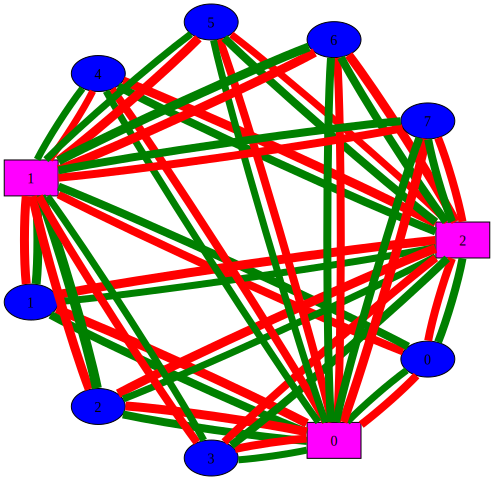

In [166]:
model.plot_graph(0, 10000)

## Результаты моделирования

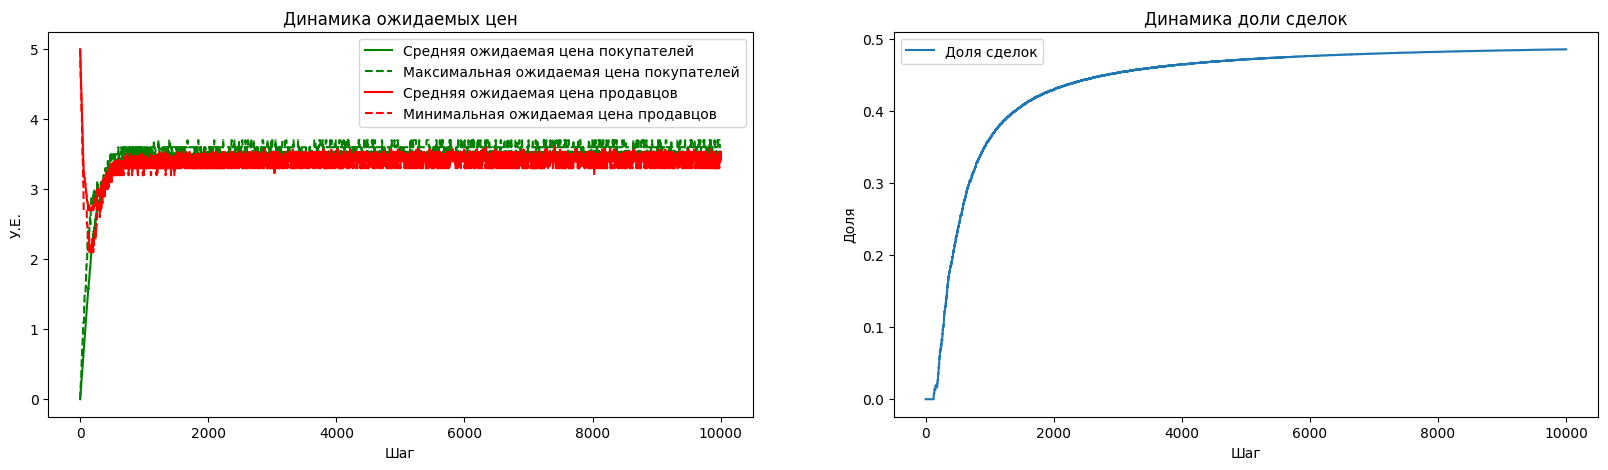

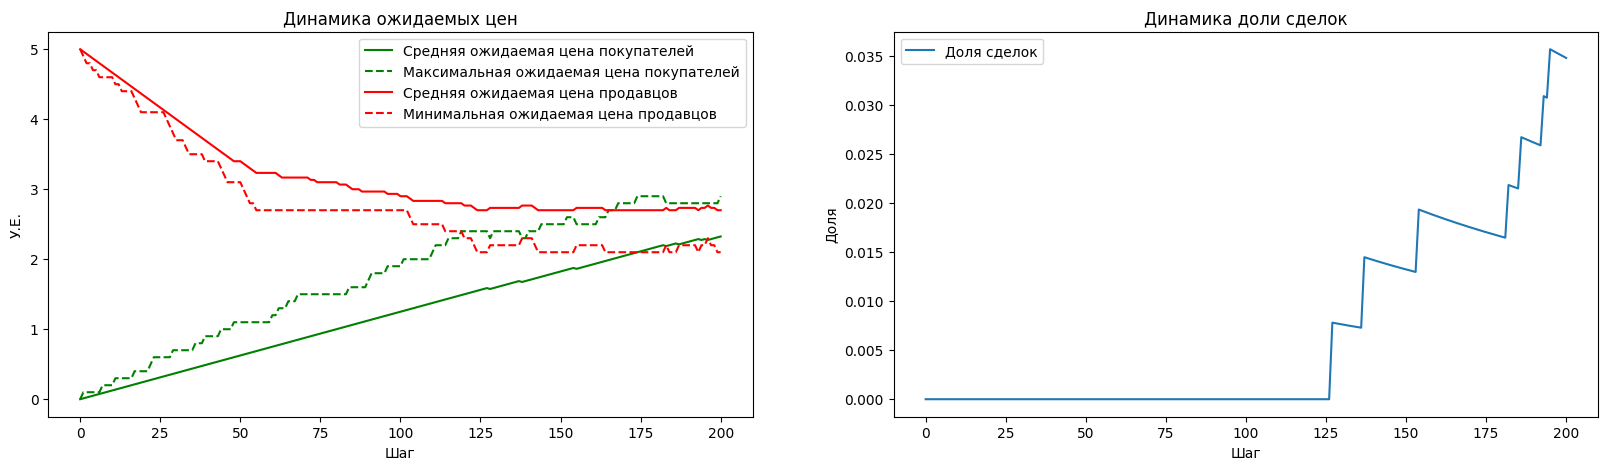

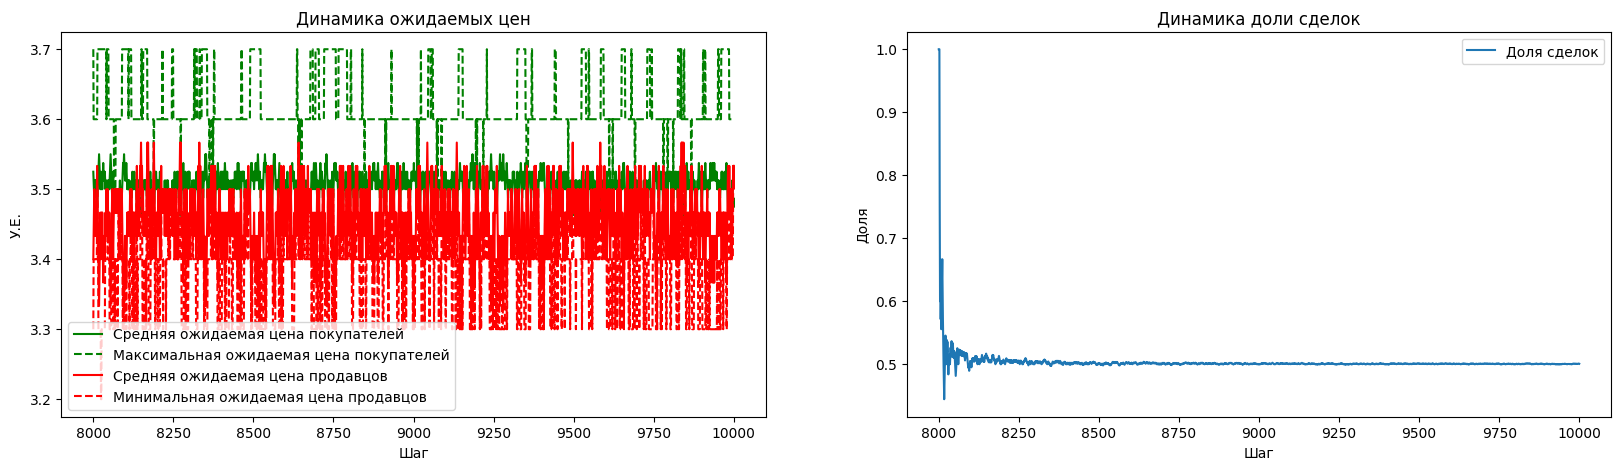

In [167]:
model.plot_dynamics(0, 10000)
model.plot_dynamics(0, 200)
model.plot_dynamics(8000, 10000)

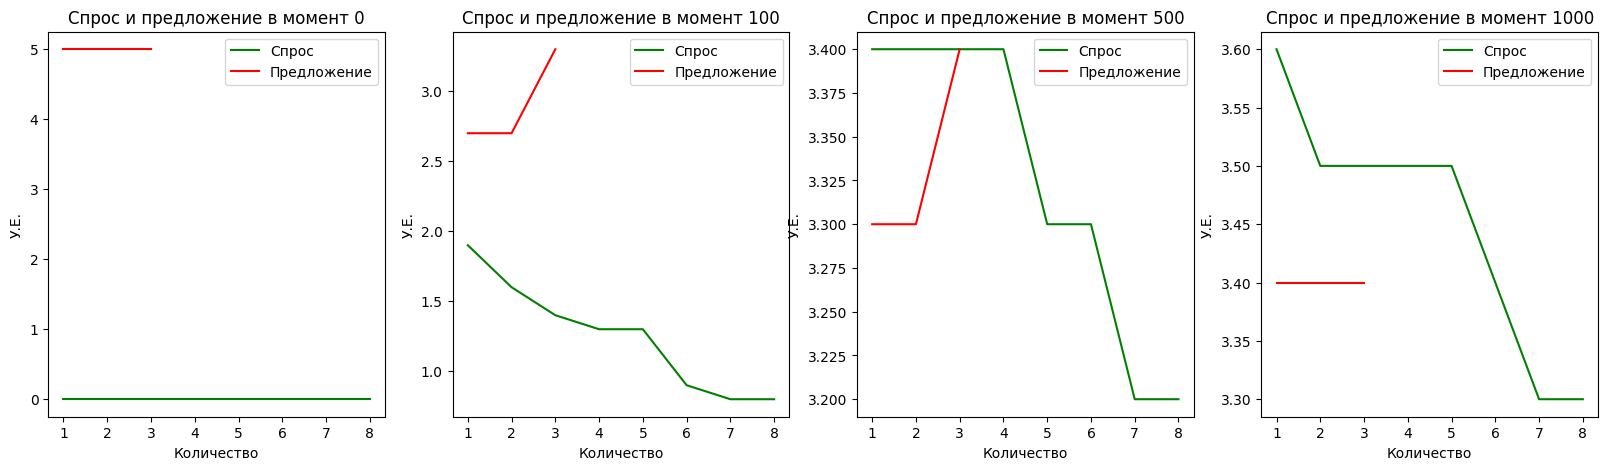

In [168]:
model.plot_supply_and_demand([0, 100, 500, 1000])

# Задания

При выполнения всех заданий Вам необходимо писать текст (в Markdown ячейках), вызывать существующие фрагменты кода и писать собственный код. При реализации кода придерживайтесь объектно-ориентированного подхода. Обращаем Ваше внимание, что в данных заданиях будет в первую очередь будет оцениваться Ваши интерпретации и выводы относительно свойств и поведения моделей.   

## Задание 1 (1 балл)

Запустите базовую модель с разными параметрами. Проанализируйте, как меняется поведение модели в зависимости от изменения параметров. Опишите эти изменения.

Проинтерпретируйте (дайте объяснение) результаты работы базовой модели. В частности, обратите внимание на следующие аспекты:
* Ожидаемые цены попадают в некоторый интервал.
* Доля сделок выходит на некоторый постоянный уровень. 
* Скорости сходимости зависят от количества продавцов и покупателей и шага цены.
* Опишите характеристики изменений диаграмм связей со временем.


Изменения при изменении параметров:
Чем больше агентов участвует в модели, тем медленнее скорость схождения ожидаемых цен.
Чем больше продавцов относительно покупателей, тем на меньшем уровне оказывается интервал ожидаемых цен по прошествии какого-то времени. То же верно для числа покупателей, но уровень наоборот больше.
В зависимости от дельты "подстраивания" также меняется скорость схождения ожидаемых цен.
В зависимости от seller_min, seller_max, consumer_min, consumer_max интервал ожидаемых цен будет либо на большем уровне, либо на меньшем (чем больше seller_max и consumer_min, тем выше интервал)


- Начиная с какого-то момента, ожидаемые средние и минимальные/максимальные цены начинают попадать только в некоторый интервал. Ожидаемые цены не могут уйти далеко из этого интервала, поскольку у каждого агента из него ожидания находятся примерно на одном уровне, а значит, что продавцам не будет смысла сильно опускать цену (они не будут часто встречать покупателей с более низкими ожиданиями). Симметричное верно и для потребителей. Кроме того, у агентов есть верхние/нижние ограничения, дальше которых выйти нельзя, даже подстриваясь.

- Общий тренд доли сделок положительный. Однако начиная с некоторого момента, их доля начинает выходить на некоторый постоянный уровень. Это может объясняться тем, что ожидаемые цены со временем сходятся к оперделенному интервалу, а число продавцов/покупателей, чьи минимальные/максимальные цены не попадают в этот интервал, оно почти неизменно (с точностью до неизменности интервала), соотвественно, вероятность для покупателя "из интервала" наткнуться на продавца "из интервала", с которым с большей долей вероятности сделка состоится, оказывается почти неизменной. То же верно для продавцов.


- Можно заметить, что чем больше суммарно агентов на рынке, тем медленнее рынок приходит в равновесное состояние. Это связано с тем, что в каждом периоде пара агентов выбирается случайно, а продавцов и покупателей много -> корректировать свои ожидания конкретный продавец и покупатель будет медленне, ведь меньше вероятность того, что именно он в каждый период будет иметь возможность заключить сделку.
Также тем скорость сходимости меньше, чем меньше шаг цены. Это напрямую следует из того, что продавцы и покупатели "менее охотно идут навстречу" друг другу, а значит, равновесие быстро не может быть достигнуто.

- Первые сделки становятся, как правило, неуспешными. Это связано с тем, что ожидаемые цены продавцов находятся на их максимуме, ожиадаемые цены покупателей - на минимуме. Таким образом, у участников рынка присутствует асимметрия информации, и, соответственно, чтобы появились первые успешные сделки, неоюходимо время для корректировки ожиданий у двух сторон. После большого количества итераций количество успешных и неуспешных связей выравнивается. Более того, выравнивется оно не только суммарно, но и для каждой пары агентов.
Также можно заметить, что связи имеют тенденцию закрепляться, то есть если какая-то пара продавец+покупатель совершила сделку, они более вероятно в дальнейшем снова заключат сделку. Это связано с тем, что чем больше агенты участвуют в рынке, тем больше их ожидания адаптируются к нему, тем реальнее, что они заключат сделку позднее.

## Задание 2 (2 балла)


Модифицируйте базовую модель одним из указанных ниже вариантов.

<b><font color="red">!</font> Номер Вашего варианта указан в <a href="https://docs.google.com/spreadsheets/d/1jWBLQ1bJG2t2Ci38r1xFrKP06VjFn-IyKQO4PIEvXTA/edit#gid=0">таблице</a>.</b>

1. Разные вероятности выбора разных продавцов и покупателей.
2. Генерация разных групп покупателей и продавцов.
3. Разные переговорные позиции продавцов и покупателей (в том числе случайные).
4. Ожидания покупателей и продавцов меняются только в сторону средней цены предыдущего периода.
5. __К граничным ценам продавцов и покупателей каждый период добавляется случайная величина.__

* Продемонстрируйте и опишите работу модифицированной модели.
* Проинтерпретируйте результаты работы модели.

Изменения относительно базовой модели: добавим методы change_max_price() и change_min_price() агентам модели, которые будут вызываться в конце каждой итерации метода run().

In [169]:
import random

def mean(lst):
    return sum(lst)/len(lst)


class Model:
    def __init__(self, num_of_consumers, num_of_sellers, consumer_min, consumer_max, consumer_delta, seller_min, seller_max, seller_delta):
        '''
            Конструктор класса.

            num_of_consumers -- количество покупателей
            num_of_sellers -- количество продавцов
            consumer_min -- минимальное возможное значение max_price для покупателей
            consumer_max -- максимально возможное значение max_price для покупателей
            consumer_delta -- шаг изменения expect_price для покупателей
            seller_min -- минимальное возможное значение min_price для продавцов
            seller_max -- максимально возможное значение min_price для продавцов
            seller_delta -- шаг изменения expect_price для продавцов

        '''
        self.num_of_consumers = num_of_consumers
        self.num_of_sellers = num_of_sellers

        # Список всех покупателей модели
        self.consumers = [Consumer(consumer_min, consumer_max, consumer_delta) for _ in range(num_of_consumers)]
        
        # Список всех продавцов модели
        self.sellers = [Seller(seller_min, seller_max, seller_delta) for _ in range(num_of_sellers)]
        
        # Список списков. На позиции i находится список текущих значений expect_price для всех покупателей на шаге i.
        self.consumers_expect_price = []
        
        # Список списков. На позиции i находится список текущих значений expect_price для всех продавцов на шаге i.
        self.sellers_expect_price = []

        # Список результатов сделок. На позиции i находится словарь вида
        # { 
        #     'consumer_id' : consumer_id,
        #     'seller_id' : seller_id
        #     'result' : result
        # }
        # где result = 1, если на i шаге была успешная сделка, иначе 0.
        self.deals_results = []


    def deal(self, consumer_id, seller_id):
        '''
            Моделирование сделки между покупателем с индексом consumer_id и продавцом с индексом seller_id

            consumer_id -- индекс покупателя в массиве self.consumers
            seller_id -- индекс продавца в массиве self.sellers
        '''
        
        # Сохраняем текущие значения expect_price покупателей
        self.consumers_expect_price.append([consumer.expect_price for consumer in self.consumers])
        
        # Сохраняем текущие значения expect_price продавцов
        self.sellers_expect_price.append([seller.expect_price for seller in self.sellers])
        
        if self.sellers[seller_id].expect_price <= self.consumers[consumer_id].expect_price:
            # Сделка состоялась
            
            # Записываем факт состоявшейся сделки
            self.deals_results.append({
                'consumer_id' : consumer_id,
                'seller_id' : seller_id,
                'result' : 1
                })

            # Данный покупатель решает уменьшить у себя expect_price
            self.consumers[consumer_id].decrease_expect_price()

            # Данный продавец решает увеличить у себя expect_price
            self.sellers[seller_id].increase_expect_price()
            
        else:
            # Сделка не состоялась
            
            # Записываем факт несостоявшейся сделки
            self.deals_results.append({
                'consumer_id' : consumer_id,
                'seller_id' : seller_id,
                'result' : 0
                })

            # Данный покупатель решает увеличить у себя expect_price
            self.sellers[seller_id].decrease_expect_price()

            # Данный продавец решает уменьшить у себя expect_price
            self.consumers[consumer_id].increase_expect_price()
            

    def run(self, num_of_steps):
        '''
            Запуск num_of_steps шагов модели
        '''
        for _ in trange(num_of_steps+1): # trange вместо range для визуализации прогресс-бара
            
            # Выбираем индекс покупателя случайным образом
            consumer_id = random.randrange(0, self.num_of_consumers)
            
            # Выбираем индекс продавца случайным образом
            seller_id = random.randrange(0, self.num_of_sellers)
            
            # Моделируем сделку
            self.deal(consumer_id, seller_id)


            # изменяем граничную цену для потребителей на случайную величину после каждой итерации
            for consumer_i in self.consumers:
                consumer_i.change_max_price()

                # проверяем, что текущая ожидаемая цена согласуется с новой граничной
                if consumer_i.expect_price > consumer_i.max_price:
                    consumer_i.expect_price = consumer_i.max_price
            
            

            # изменяем граничную цену для производителей на случайную величину после каждой итерации
            for seller_i in self.sellers:
                seller_i.change_min_price()

                # проверяем, что текущая ожидаемая цена согласуется с новой граничной
                if seller_i.expect_price < seller_i.min_price:
                    seller_i.expect_price = seller_i.min_price
                

    def plot_dynamics(self, start, end):
        '''
            Визуализация динамики модели на шагах от start до end включительно
        '''

        # Формируем два графика по горизонтали
        fig = plt.figure(figsize = (20,5))
        ax1 = fig.add_subplot(1,2,1)
        ax2 = fig.add_subplot(1,2,2)
        
        # Список точек по оси шагов
        steps_range = list(range(start, end+1))
        ax1.title.set_text("Динамика ожидаемых цен")

        # Среднее значение expect_price среди покупателей
        ax1.plot(steps_range, list(map(mean, self.consumers_expect_price[start : end+1])), color='g', label = "Средняя ожидаемая цена покупателей")
        
        # Максимальное значение expect_price среди покупателей
        ax1.plot(steps_range, list(map(max, self.consumers_expect_price[start : end+1])), color='g', linestyle='--', label = "Максимальная ожидаемая цена покупателей")
        
        # Среднее значение expect_price среди продавцов
        ax1.plot(steps_range, list(map(mean, self.sellers_expect_price[start : end+1])), color='r', label = "Средняя ожидаемая цена продавцов")
        
        # Минимальное значение expect_price среди продавцов
        ax1.plot(steps_range, list(map(min, self.sellers_expect_price[start : end+1])), color='r', linestyle='--', label = "Минимальная ожидаемая цена продавцов")
        # ax1.plot(steps_range, list(map(max, self.sellers_expect_price[start : end+1])), color='b', linestyle='--', label = "Минимальная ожидаемая цена продавцов")

        ax1.legend()
        ax1.set_xlabel("Шаг")
        ax1.set_ylabel("У.Е.")


        # Находим долю успешных сделок на отрезке от start до end включительно
        deals_sum = [0]
        for i in range(start, end+1):
            deals_sum.append(deals_sum[-1] + self.deals_results[i]['result'])
        deals_fraction = [deals_sum[i] / i for i in range(1, end - start + 2)]
        ax2.title.set_text("Динамика доли сделок")
        ax2.plot(steps_range, deals_fraction, label="Доля сделок")
        ax2.legend()
        ax2.set_xlabel("Шаг")
        ax2.set_ylabel("Доля")

    def plot_supply_and_demand(self, pos_list):
        '''
            Визуализация спроса и предложения в моменты времени, указанные в списке pos_list
        '''
        
        # Формируем фигуру, состоящую из len(pos) графиков, расположенных горизонтально
        fig, axs = plt.subplots(1, len(pos_list), figsize = (5 * len(pos_list), 5))


        for i in range(len(pos_list)):
            # Для каждого значения из pos рисуем свой график
            axs[i].title.set_text(f"Спрос и предложение в момент {pos_list[i]}")

            # Все значения expect_price для покупателей в момент времени pos[i] сортируем по убыванию. 
            # Этот график описывает функцию спроса, т.е. при заданном значении цены мы видим, какое количество покупателей готовы купить товар за данную цену или дороже
            axs[i].plot(list(range(1, self.num_of_consumers+1)), sorted(self.consumers_expect_price[pos_list[i]], reverse=True), color='g', label="Спрос")
            
            # Все значения expect_price для продавцов в момент времени pos[i] сортируем по возрастанию. 
            # Этот график описывает функцию предложения, т.е. при заданном значении цены мы видим, какое количество продавцов готовы продать товар за данную цену или дешевле
            axs[i].plot(list(range(1, self.num_of_sellers+1)), sorted(self.sellers_expect_price[pos_list[i]]), color='r', label="Предложение")
            
            axs[i].legend()
            axs[i].set_xlabel("Количество")
            axs[i].set_ylabel("У.Е.")

    def plot_graph(self, start, end):
        '''
            Построение и визуализация графа удачных и неудачных сделок 
            на отрезке времени от start до end.
        '''
        # Словарь для построения графа сделок.
        # Ключ -- пара (consumer_id, seller_id)
        # Значение -- словарь с ключами 'positive_count' и 'negative_count',
        # в которых будут подсчитано количество удачных и неудачных сделок 
        # между consumer_id и seller_id в интервале от start до end
        g_deals = {}

        # Создание всех ключей в g_deals и инициирование нулевыми значениями
        for consumer_id in range(self.num_of_consumers):
            for seller_id in range(self.num_of_sellers):
                g_deals[(consumer_id, seller_id)] = {
                    'positive_count' : 0,
                    'negative_count' : 0,
                }

        # Для всех моментов времени от start до end    
        for i in range(start, end+1):
            
            
            if self.deals_results[i]['result'] == 0: #Если сделка неудачная
                # то увеличиваем счетчик неудачных сделок для данной пары consumer_id и seller_id
                g_deals[self.deals_results[i]['consumer_id'], self.deals_results[i]['seller_id']]['negative_count'] += 1
            else:
                g_deals[self.deals_results[i]['consumer_id'], self.deals_results[i]['seller_id']]['positive_count'] += 1

        max_value = 0
        for edge, value in g_deals.items():
            max_value = max(max_value, value['negative_count'], value['positive_count'])

        graph = graphviz.Graph()
        for consumer_id in range(self.num_of_consumers):
            graph.node(f"С {consumer_id}", label=str(consumer_id), style='filled', fillcolor='blue')

        for seller_id in range(self.num_of_sellers):
            graph.node(f"S {seller_id}", label=str(seller_id), style='filled', fillcolor='magenta', shape='box')
        
        def get_penwidth(x):
            return str(10*x // max_value)

        for edge, value in g_deals.items():
            graph.edge(f"С {edge[0]}", f"S {edge[1]}", penwidth = get_penwidth(value['negative_count']), color="red")
            graph.edge(f"С {edge[0]}", f"S {edge[1]}", penwidth =  get_penwidth(value['positive_count']), color="green")

        graph.attr(layout="circo")
        return graph


class Consumer:
    def __init__(self, consumer_min, consumer_max, consumer_delta):
        self.max_price = consumer_min + random.random()*(consumer_max - consumer_min)
        self.expect_price = 0
        self.delta = consumer_delta

    def increase_expect_price(self):
        if self.expect_price + self.delta <= self.max_price:
            self.expect_price += self.delta
            
    def decrease_expect_price(self):
        self.expect_price -= self.delta

    # изменяем значение максимальной цены на случайную величину
    def change_max_price(self):
        self.max_price += random.uniform(-1, 1)
    


class Seller:
    def __init__(self, seller_min, seller_max, seller_delta):
        self.min_price = seller_min + random.random()*(seller_max - seller_min)
        self.expect_price = seller_max
        self.delta = seller_delta

    def increase_expect_price(self):
        self.expect_price += self.delta

    def decrease_expect_price(self):
        if self.expect_price - self.delta >= self.min_price:
            self.expect_price -= self.delta

    # изменяем значение минмальной цены на случайную величину
    def change_min_price(self):
        self.min_price += random.uniform(-1, 1)



In [170]:
# random.seed(42)
# model = Model(num_of_consumers=3,
#               num_of_sellers=3,
#               consumer_min=4,
#               consumer_max =10,
#               consumer_delta=0.1,
#               seller_min=2,
#               seller_max=5,
#               seller_delta=0.1)
# model.run(10000)


random.seed(42)
max_c = 10
q_of_periods = 10000
model = Model(num_of_consumers=8,
              num_of_sellers=3,
              consumer_min=8,
              consumer_max =10,
              consumer_delta=0.1,
              seller_min=2,
              seller_max=5,
              seller_delta=0.1
              )
model.run(q_of_periods)

100%|██████████| 10001/10001 [00:00<00:00, 48374.12it/s]


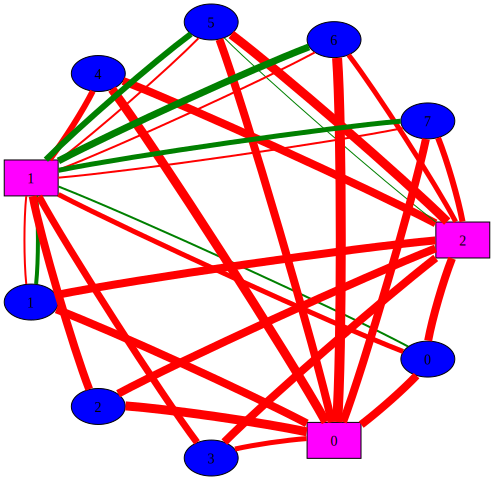

In [171]:
model.plot_graph(0, 1000)

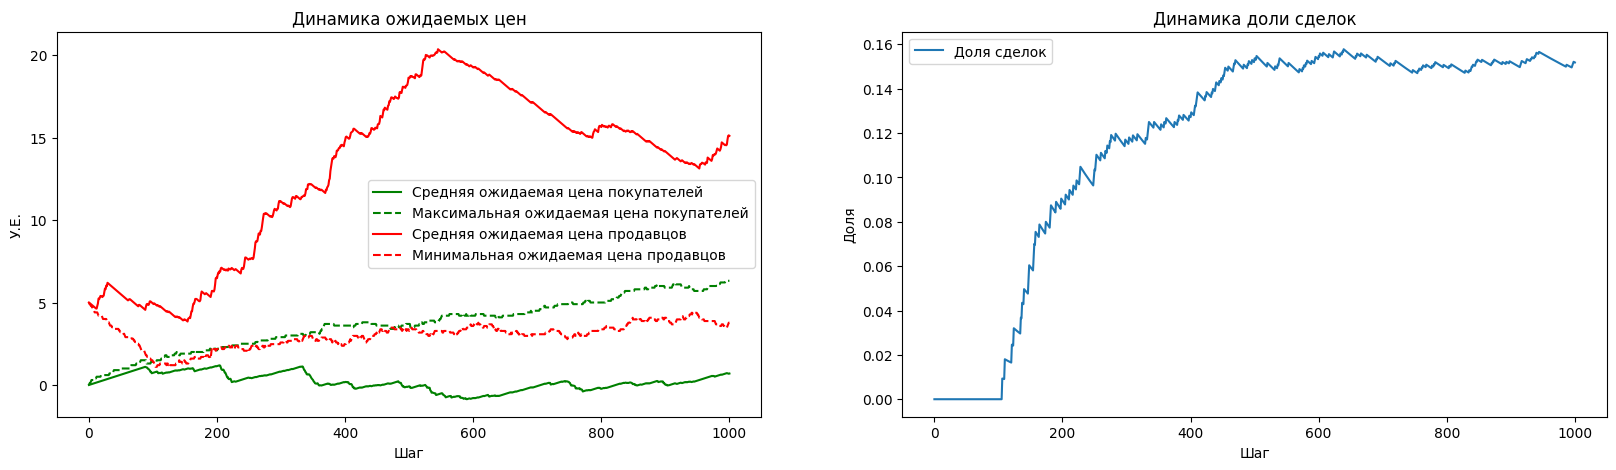

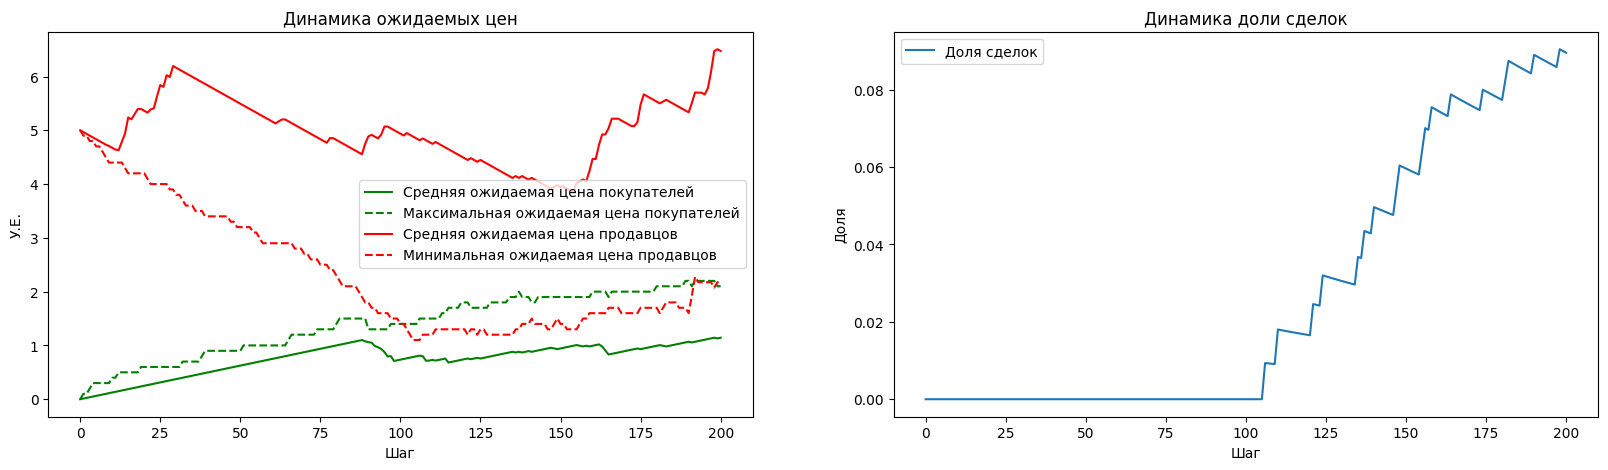

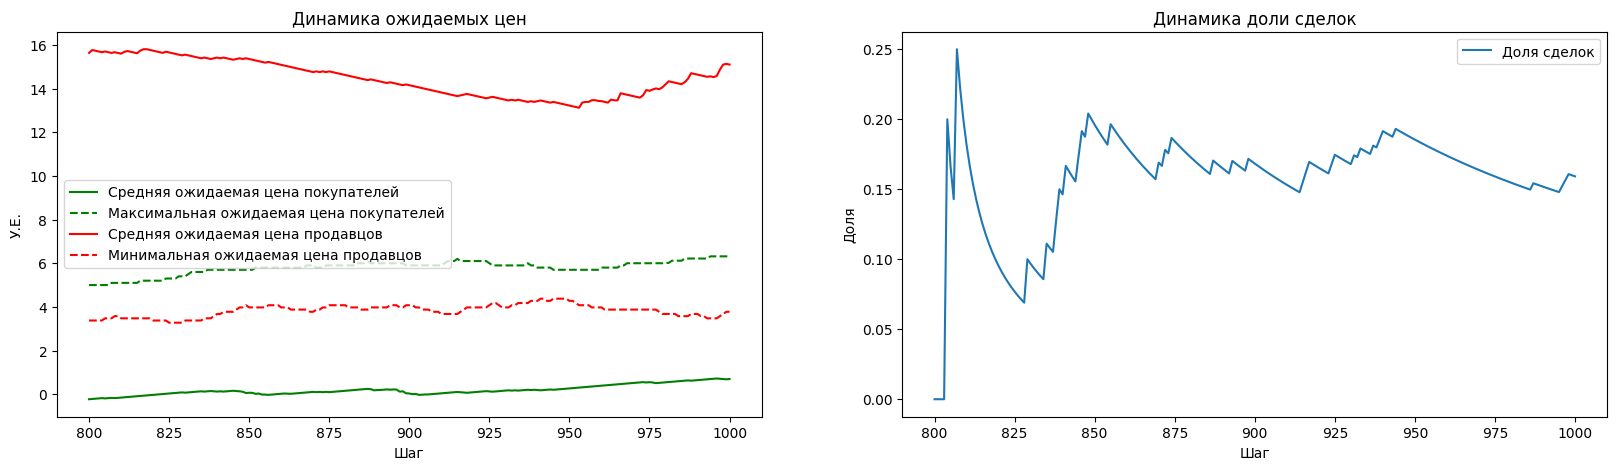

In [172]:
model.plot_dynamics(0, 1000)
model.plot_dynamics(0, 200)
model.plot_dynamics(800, 1000)

Модель стала обладать большей волатильностью после добавления случайной величины к граничным ценам. Из-за этого рынок сходится медленне, а в каких-то случаях можно наблюдать продолжительные участки, на которых рынок расходится. Это связано с тем, что теперь не все действия агентов рациональны, добавляется шум в принятие решений. Это влечет за собой падающую долю состоявшихся сделок, ведь теперь у каждого агента совокупные ожидания относительно рынка меняются чаще, что создает больше неопределенности. 

## Задание 3 (3 балла)

Предположим, что теперь мы рассматриваем последовательные дни, и контакты продавцов и покупателей происходят в течение дня. Количество контактов между продавцами и покупателями в день ограничено константой max_connections, и не меняется в процессе моделирования.

Выделим локальные (внутридневные) параметры, которые меняются и учитываются в течение одного дня. Но на следующий день сбрасываются до исходных значений. 

Модифицируйте базовую модель одним из указанных ниже вариантов.

<b><font color="red">!</font> Номер Вашего варианта указан в <a href="https://docs.google.com/spreadsheets/d/1jWBLQ1bJG2t2Ci38r1xFrKP06VjFn-IyKQO4PIEvXTA/edit#gid=0">таблице</a>.</b>

1. Локальные параметры: количество сделок агента. Не может быть более одной сделки.
2. Локальные параметры: у каждого продавца свое фиксированное количество товара, которое он может продать в один день. В конце для излишки сгорают.
3. Локальные параметры: у каждого покупателя свое фиксированное количество товара, которое он может купить в один день. 
4. __Локальные параметры: у каждого продавца случайное количество товара, которое он может продать в один день. В конце для излишки сгорают.__
5. Локальные параметры: у каждого покупателя случайное количество товара, которое он может купить в один день.

* Продемонстрируйте и опишите работу модифицированной модели.
* Проинтерпретируйте результаты работы модели.

Теперь на вход модель будет принимать еще один параметр - max_connections. \
К локальным параметрам добавляется quantity - случайное количество товара, которое продавец может реализовать в течении одного дня. Вследствие этого появляется новый тип несостоявшейся сделки - нехватка товара. Будем полагать, что в данном случае и продавцы, и покупатели будут повышать expected_price, потому что сталкиваются с дефицитом.

In [173]:
def mean(lst):
    return sum(lst)/len(lst)


random.seed(42)

class Model:
    def __init__(self, num_of_consumers, num_of_sellers, consumer_min, consumer_max, consumer_delta, seller_min, seller_max, seller_delta, max_connections):
        '''
            Конструктор класса.

            num_of_consumers -- количество покупателей
            num_of_sellers -- количество продавцов
            consumer_min -- минимальное возможное значение max_price для покупателей
            consumer_max -- максимально возможное значение max_price для покупателей
            consumer_delta -- шаг изменения expect_price для покупателей
            seller_min -- минимальное возможное значение min_price для продавцов
            seller_max -- максимально возможное значение min_price для продавцов
            seller_delta -- шаг изменения expect_price для продавцов
            max_connections -- максимальное количество сделок за день

        '''
        self.num_of_consumers = num_of_consumers
        self.num_of_sellers = num_of_sellers
        self.max_connections = max_connections

        # Список всех покупателей модели
        self.consumers = [Consumer(consumer_min, consumer_max, consumer_delta) for _ in range(num_of_consumers)]
        
        # Список всех продавцов модели
        self.sellers = [Seller(seller_min, seller_max, seller_delta) for _ in range(num_of_sellers)]
        
        # Список списков. На позиции i находится список текущих значений expect_price для всех покупателей на шаге i.
        self.consumers_expect_price = []
        
        # Список списков. На позиции i находится список текущих значений expect_price для всех продавцов на шаге i.
        self.sellers_expect_price = []

        # Список списков. На позиции i находится список пар текущих значений quantity + expect_price для всех продавцов на шаге i.
        self.sellers_quantities = []

        # Список результатов сделок. На позиции i находится словарь вида
        # { 
        #     'consumer_id' : consumer_id,
        #     'seller_id' : seller_id
        #     'result' : result
        # }
        # где result = 1, если на i шаге была успешная сделка, иначе 0.
        self.deals_results = []


    def deal(self, consumer_id, seller_id):
        '''
            Моделирование сделки между покупателем с индексом consumer_id и продавцом с индексом seller_id

            consumer_id -- индекс покупателя в массиве self.consumers
            seller_id -- индекс продавца в массиве self.sellers
        '''
        
        if self.sellers[seller_id].expect_price <= self.consumers[consumer_id].expect_price and self.sellers[seller_id].quantity > 0:
            # Сделка состоялась

            # уменьшаем количество доступного для продажи товара
            self.sellers[seller_id].quantity -= 1
            
            # Записываем факт состоявшейся сделки
            self.deals_results.append({
                'consumer_id' : consumer_id,
                'seller_id' : seller_id,
                'result' : 1
                })

            # Данный покупатель решает уменьшить у себя expect_price
            self.consumers[consumer_id].decrease_expect_price()

            # Данный продавец решает увеличить у себя expect_price
            self.sellers[seller_id].increase_expect_price()

        elif self.sellers[seller_id].expect_price <= self.consumers[consumer_id].expect_price:
            # сделка не состоялась, но не из-за цен, а из-за недостаточного количества товара

            # Записываем факт несостоявшейся сделки
            self.deals_results.append({
                'consumer_id' : consumer_id,
                'seller_id' : seller_id,
                'result' : 0
                })

            # продавец видит спрос со стороны потребителя, поэтому повысит цену
            self.sellers[seller_id].increase_expect_price()

            # покупатель видит возникший дефицит, поэтому повысит ожидаемую цену
            self.consumers[consumer_id].increase_expect_price()
            
        else:
            # Сделка не состоялась
            
            # Записываем факт несостоявшейся сделки
            self.deals_results.append({
                'consumer_id' : consumer_id,
                'seller_id' : seller_id,
                'result' : 0
                })

            # Данный покупатель решает увеличить у себя expect_price
            self.consumers[consumer_id].increase_expect_price()

            # Данный продавец решает уменьшить у себя expect_price
            self.sellers[seller_id].decrease_expect_price()
            

    def run(self, num_of_steps):
        '''
            Запуск num_of_steps шагов модели
        '''

        # перебор дней
        for _ in trange(num_of_steps+1): # trange вместо range для визуализации прогресс-бара

            
            # Сохраняем текущие значения expect_price покупателей
            self.consumers_expect_price.append([consumer.expect_price for consumer in self.consumers])
            
            # Сохраняем текущие значения expect_price продавцов
            self.sellers_expect_price.append([seller.expect_price for seller in self.sellers])

            # Сохраняем текущие значения quantity + expect_price продавцов
            self.sellers_quantities.append([(seller.expect_price, seller.quantity) for seller in self.sellers])


            # сделки внутри одного дня
            for con in range(self.max_connections):
            
                # Выбираем индекс покупателя случайным образом
                consumer_id = random.randrange(0, self.num_of_consumers)
                
                # Выбираем индекс продавца случайным образом
                seller_id = random.randrange(0, self.num_of_sellers)
                
                # Моделируем сделку
                self.deal(consumer_id, seller_id)
            
            
            # переопределяем запасы товаров для каждого продавца
            for seller in self.sellers:
                seller.quantity = random.randint(0, 10)


    def plot_dynamics(self, start, end):
        '''
            Визуализация динамики модели на шагах от start до end включительно
        '''

        # Формируем два графика по горизонтали
        fig = plt.figure(figsize = (20,5))
        ax1 = fig.add_subplot(1,2,1)
        ax2 = fig.add_subplot(1,2,2)
        
        # Список точек по оси шагов
        steps_range = list(range(start, end+1))
        ax1.title.set_text("Динамика ожидаемых цен")

        # Среднее значение expect_price среди покупателей
        ax1.plot(steps_range, list(map(mean, self.consumers_expect_price[start : end+1])), color='g', label = "Средняя ожидаемая цена покупателей")
        
        # Максимальное значение expect_price среди покупателей
        ax1.plot(steps_range, list(map(max, self.consumers_expect_price[start : end+1])), color='g', linestyle='--', label = "Максимальная ожидаемая цена покупателей")
        
        # Среднее значение expect_price среди продавцов
        ax1.plot(steps_range, list(map(mean, self.sellers_expect_price[start : end+1])), color='r', label = "Средняя ожидаемая цена продавцов")
        
        # Минимальное значение expect_price среди продавцов
        ax1.plot(steps_range, list(map(min, self.sellers_expect_price[start : end+1])), color='r', linestyle='--', label = "Минимальная ожидаемая цена продавцов")
        # ax1.plot(steps_range, list(map(max, self.sellers_expect_price[start : end+1])), color='b', linestyle='--', label = "Минимальная ожидаемая цена продавцов")

        ax1.legend()
        ax1.set_xlabel("Шаг")
        ax1.set_ylabel("У.Е.")


        # Находим долю успешных сделок на отрезке от start до end включительно
        deals_sum = [0]
        for i in range(start, end+1):

            q_of_deals_day = 0  # число удавшихся сделок в течение дня
            for j in range(self.max_connections):
                q_of_deals_day += self.deals_results[i * self.max_connections + j]['result']

            deals_sum.append(deals_sum[-1] + q_of_deals_day)

        deals_fraction = [deals_sum[i] / (i * self.max_connections) for i in range(1, end - start + 2)]
        
        ax2.title.set_text("Динамика доли сделок")
        ax2.plot(steps_range, deals_fraction, label="Доля сделок")
        ax2.legend()
        ax2.set_xlabel("Шаг")
        ax2.set_ylabel("Доля")

    def plot_supply_and_demand(self, pos_list):
        '''
            Визуализация спроса и предложения в моменты времени, указанные в списке pos_list
        '''
        
        # Формируем фигуру, состоящую из len(pos) графиков, расположенных горизонтально
        fig, axs = plt.subplots(1, len(pos_list), figsize = (5 * len(pos_list), 5))


        for i in range(len(pos_list)):
            # Для каждого значения из pos рисуем свой график
            axs[i].title.set_text(f"Спрос и предложение в момент {pos_list[i]}")

            # Все значения expect_price для покупателей в момент времени pos[i] сортируем по убыванию. 
            # Этот график описывает функцию спроса, т.е. при заданном значении цены мы видим, какое количество покупателей готовы купить товар за данную цену или дороже
            axs[i].plot(list(range(1, self.num_of_consumers+1)), sorted(self.consumers_expect_price[pos_list[i]], reverse=True), color='g', label="Спрос")
            
            # Все значения expect_price+quantity для продавцов в момент времени pos[i] сортируем по возрастанию.
            sorted_supply = sorted(self.sellers_quantities[pos_list[i]])
            # Смотрим, сколько товара доступно на рынке при каждой цене: столько же, сколько раньше + quntity тех продавцов, для котороых текущая цена минимальная
            q_in_market = [0]
            for j in range(self.num_of_sellers):
                q_in_market.append(q_in_market[-1] + sorted_supply[j][1])
            # Этот график описывает функцию предложения, т.е. при заданном значении цены мы видим, какое количество продавцов готовы продать товар за данную цену или дешевле
            axs[i].plot(q_in_market[1:], sorted(self.sellers_expect_price[pos_list[i]]), color='r', label="Предложение")
            
            axs[i].legend()
            axs[i].set_xlabel("Количество")
            axs[i].set_ylabel("У.Е.")

    def plot_graph(self, start, end):
        '''
            Построение и визуализация графа удачных и неудачных сделок 
            на отрезке времени от start до end.
        '''
        # Словарь для построения графа сделок.
        # Ключ -- пара (consumer_id, seller_id)
        # Значение -- словарь с ключами 'positive_count' и 'negative_count',
        # в которых будут подсчитано количество удачных и неудачных сделок 
        # между consumer_id и seller_id в интервале от start до end
        g_deals = {}

        # Создание всех ключей в g_deals и инициирование нулевыми значениями
        for consumer_id in range(self.num_of_consumers):
            for seller_id in range(self.num_of_sellers):
                g_deals[(consumer_id, seller_id)] = {
                    'positive_count' : 0,
                    'negative_count' : 0,
                }

        # Для всех моментов времени от start до end    
        for i in range(start, end+1):

            if self.deals_results[i]['result'] == 0: #Если сделка неудачная
                # то увеличиваем счетчик неудачных сделок для данной пары consumer_id и seller_id
                g_deals[self.deals_results[i]['consumer_id'], self.deals_results[i]['seller_id']]['negative_count'] += 1
            else:
                g_deals[self.deals_results[i]['consumer_id'], self.deals_results[i]['seller_id']]['positive_count'] += 1

        max_value = 0
        for edge, value in g_deals.items():
            max_value = max(max_value, value['negative_count'], value['positive_count'])

        graph = graphviz.Graph()
        for consumer_id in range(self.num_of_consumers):
            graph.node(f"С {consumer_id}", label=str(consumer_id), style='filled', fillcolor='blue')

        for seller_id in range(self.num_of_sellers):
            graph.node(f"S {seller_id}", label=str(seller_id), style='filled', fillcolor='magenta', shape='box')
        
        def get_penwidth(x):
            return str(10*x // max_value)

        for edge, value in g_deals.items():
            graph.edge(f"С {edge[0]}", f"S {edge[1]}", penwidth = get_penwidth(value['negative_count']), color="red")
            graph.edge(f"С {edge[0]}", f"S {edge[1]}", penwidth =  get_penwidth(value['positive_count']), color="green")

        graph.attr(layout="circo")
        return graph


class Consumer:
    def __init__(self, consumer_min, consumer_max, consumer_delta):
        self.max_price = consumer_min + random.random()*(consumer_max - consumer_min)
        self.expect_price = 0
        self.delta = consumer_delta

    def increase_expect_price(self):
        if self.expect_price + self.delta <= self.max_price:
            self.expect_price += self.delta

    def decrease_expect_price(self):
        self.expect_price -= self.delta


class Seller:
    def __init__(self, seller_min, seller_max, seller_delta):
        self.min_price = seller_min + random.random()*(seller_max - seller_min)
        self.expect_price = seller_max
        self.delta = seller_delta
        # определяем, сколько товара предлагает продавец в конкретый день
        self.quantity = random.randint(0, 10)

    def increase_expect_price(self):
        self.expect_price += self.delta

    def decrease_expect_price(self):
        if self.expect_price - self.delta >= self.min_price:
            self.expect_price -= self.delta



In [174]:
random.seed(42)
max_c = 30
q_of_periods = 2000
model = Model(num_of_consumers=8,
              num_of_sellers=3,
              consumer_min=6,
              consumer_max =10,
              consumer_delta=0.1,
              seller_min=2,
              seller_max=5,
              seller_delta=0.1,
              max_connections=max_c)
model.run(q_of_periods)

100%|██████████| 2001/2001 [00:00<00:00, 6042.93it/s]


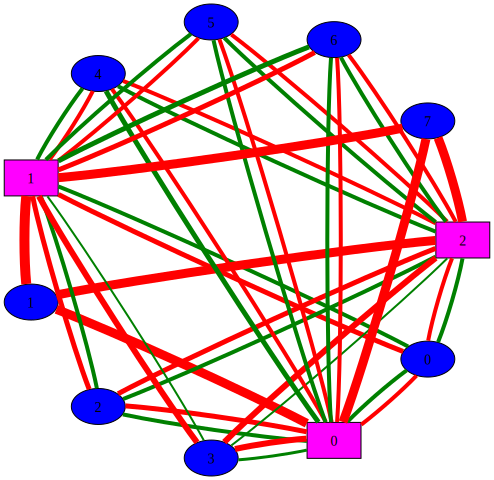

In [175]:
model.plot_graph(0, q_of_periods * max_c)

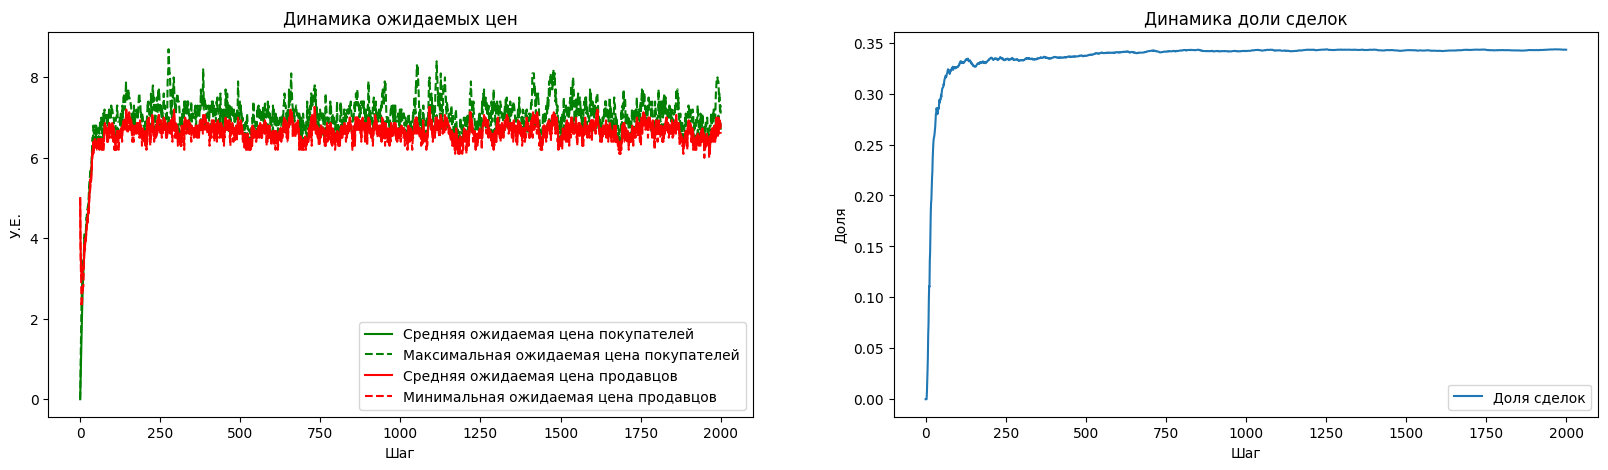

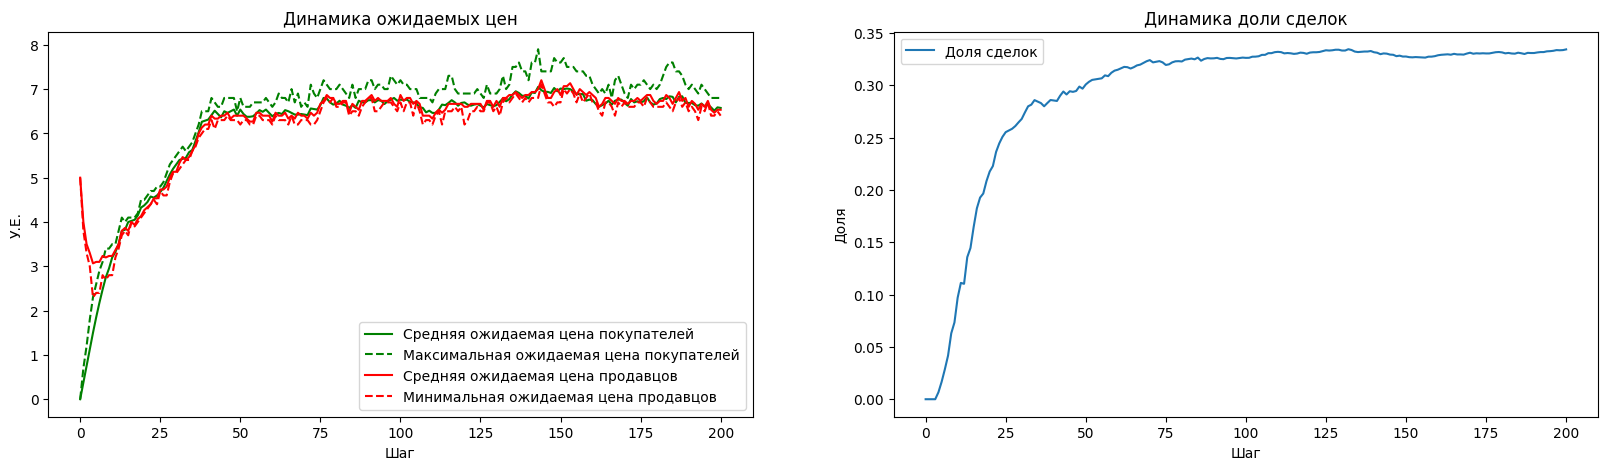

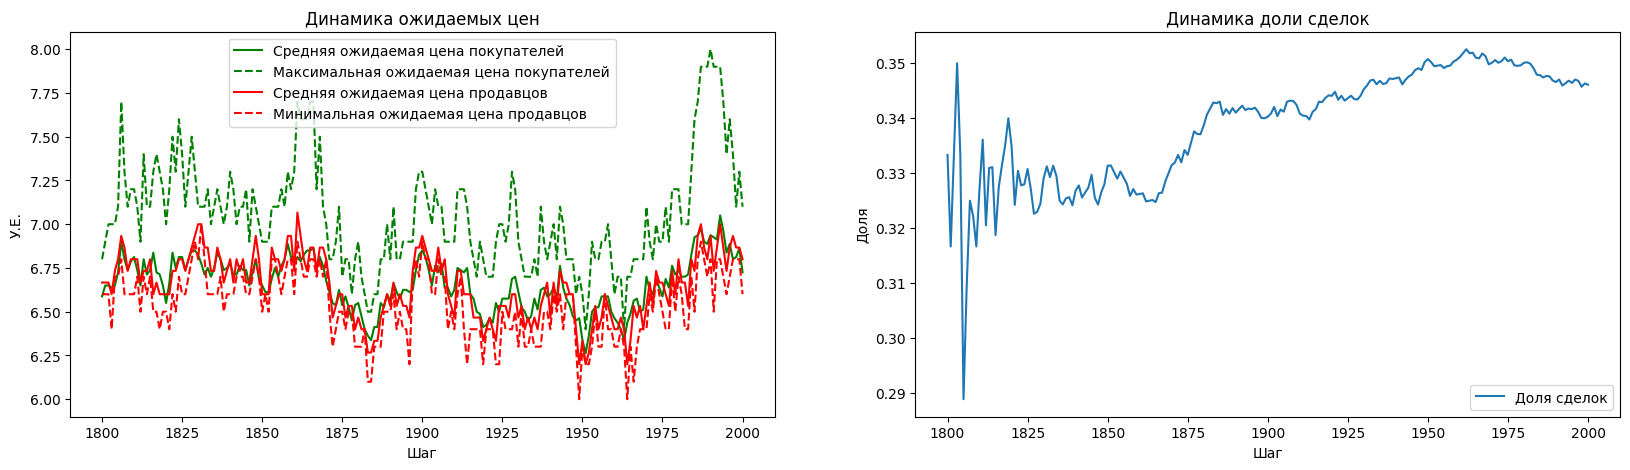

In [176]:
model.plot_dynamics(0, q_of_periods)
model.plot_dynamics(0, 200)
model.plot_dynamics(1800, 2000)

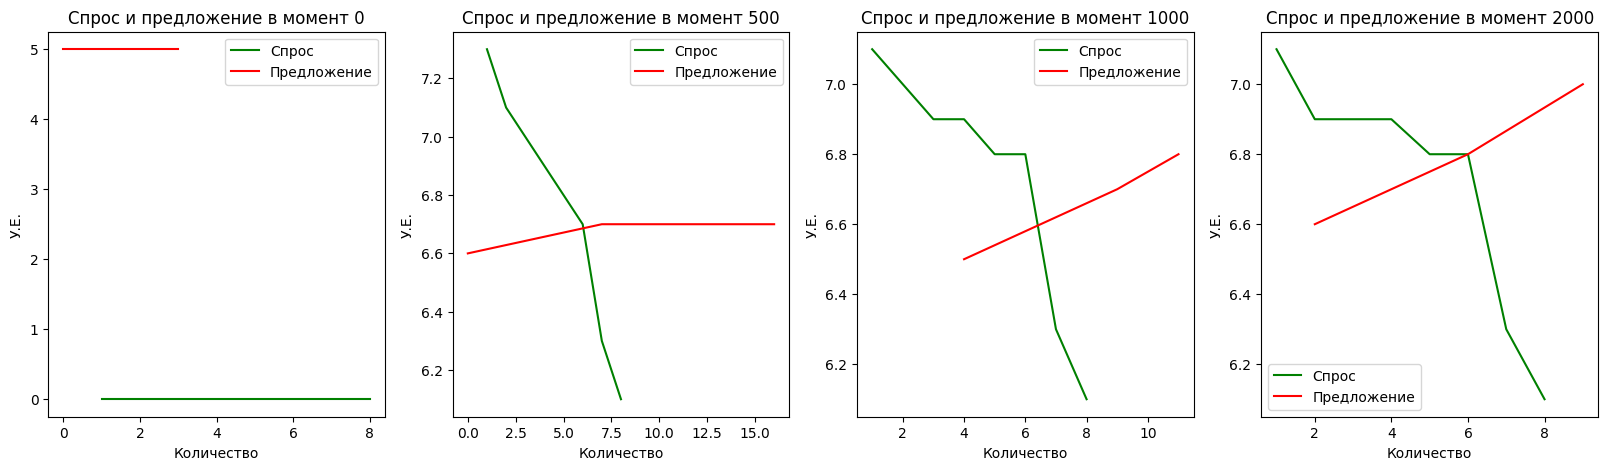

In [177]:
model.plot_supply_and_demand([0, 500, 1000, 2000])

Если сравнивать результаты работы этой модели с результатами работы базовой модели со схожими входными, то оказывается, что в целом они похожи, то есть в какой-то момент доля сделок начинается быть примерно на одном и тос же уровне, а графики ожидаемых цен сходятся к какому-то интервалу (у него менее явные границы по сравнениб с базовой реализацией). Однако текущая модель опять же представляется более волатильной. Это объяснимо тем, что у каждого продавца в различных периодах оказываются разные запасы, поэтому их ожидания колеблются. Тем не менее, за счет того, что запасы - сулчайные величины из одного и того же диапазона, суммарное количество товара на рынке слабо меняется ото дня к дню, а вследствие этого модель все же приходит в какое-то "полустационарное" состояние. 


## Задание 4 (4 балла)


Придумайте свою модификацию модели, в которой отражены другие черты реальных рынков.

<b><font color="red">!</font> Перед выполнением задания необходимо <a href="https://docs.google.com/forms/d/e/1FAIpQLSdYmodGU144W_1L45tfIGmGpK9_0yRlVp7XeSG4yKfUGCkMTg/viewform">согласовать</a> Вашу идею с преподавателем. Ваше предложение не должно совпадать с предыдущими модификациями или модификациями других студентов.
Все согласованные предложения от студентов будут отображаться в <a href="https://docs.google.com/spreadsheets/d/1enXCHHBGYJA1iAUvuDj7TYCyBIHjX3rtZ5D4FIXnbZ8/edit?usp=sharing">таблице</a>.</b>

* Продемонстрируйте и опишите работу модифицированной модели.
* По возможности сделайте ее визуализацию.
* Проинтерпретируйте результаты работы модели.

Введем в модель черный рынок.\
Каждый день на нем появляется какое-то количество товара для продажи - случайная величина (black_market_q).
Цена устанавливается на уровне, равном минимуму среди всех expected_price продавцов. \
Выбираются пары агентов (аналогично модели из задания 3 есть ограничение по числу попыток совершения сделки - max_connections). Если сделка может быть успешной, то она состоится. Если нет, то потребитель имеет возможность приобрести товар на черном рынке.\
 max_price и min_price меняются аналогично базовой модели, то есть если потребитель смог принять участие в сделке (неважно, кто оказался вторым агентом), то он опускает ожидаемую цену, а если нет, то поднимает.

In [178]:
def mean(lst):
    return sum(lst)/len(lst)


random.seed(42)

class Model:
    def __init__(self, num_of_consumers, num_of_sellers, consumer_min, consumer_max, consumer_delta, seller_min, seller_max, seller_delta, max_connections):
        '''
            Конструктор класса.

            num_of_consumers -- количество покупателей
            num_of_sellers -- количество продавцов
            consumer_min -- минимальное возможное значение max_price для покупателей
            consumer_max -- максимально возможное значение max_price для покупателей
            consumer_delta -- шаг изменения expect_price для покупателей
            seller_min -- минимальное возможное значение min_price для продавцов
            seller_max -- максимально возможное значение min_price для продавцов
            seller_delta -- шаг изменения expect_price для продавцов
            max_connections -- максимальное количество сделок за день

        '''
        self.num_of_consumers = num_of_consumers
        self.num_of_sellers = num_of_sellers
        self.max_connections = max_connections

        # Список всех покупателей модели
        self.consumers = [Consumer(consumer_min, consumer_max, consumer_delta) for _ in range(num_of_consumers)]
        
        # Список всех продавцов модели
        self.sellers = [Seller(seller_min, seller_max, seller_delta) for _ in range(num_of_sellers)]
        
        # Список списков. На позиции i находится список текущих значений expect_price для всех покупателей на шаге i.
        self.consumers_expect_price = []
        
        # Список списков. На позиции i находится список текущих значений expect_price для всех продавцов на шаге i.
        self.sellers_expect_price = []

        # Список списков. На позиции i находится список пар текущих значений quantity + expect_price для всех продавцов на шаге i.
        self.sellers_quantities = []

        # Список результатов сделок. На позиции i находится словарь вида
        # { 
        #     'consumer_id' : consumer_id,
        #     'seller_id' : seller_id
        #     'result' : result
        # }
        # где result = 1, если на i шаге была успешная сделка, иначе 0.
        self.deals_results = []

        # количество товара доступное на черном рынке
        self.black_market_q = 5

        # цена, установившаяся на черном рынке
        self.black_market_price = 2

        # список цен и количеств на черном рынке в зависимости от дня
        self.black_market_prices = []
        self.black_market_quantities = []


    def deal(self, consumer_id, seller_id):
        '''
            Моделирование сделки между покупателем с индексом consumer_id и продавцом с индексом seller_id

            consumer_id -- индекс покупателя в массиве self.consumers
            seller_id -- индекс продавца в массиве self.sellers
        '''
        
        if self.sellers[seller_id].expect_price <= self.consumers[consumer_id].expect_price and self.sellers[seller_id].quantity > 0:
            # Сделка состоялась

            # уменьшаем количество доступного для продажи товара у данного продавца
            self.sellers[seller_id].quantity -= 1
            
            # Записываем факт состоявшейся сделки
            self.deals_results.append({
                'consumer_id' : consumer_id,
                'seller_id' : seller_id,
                'result' : 1
                })

            # Данный покупатель решает уменьшить у себя expect_price
            self.consumers[consumer_id].decrease_expect_price()

            # Данный продавец решает увеличить у себя expect_price
            self.sellers[seller_id].increase_expect_price()
        else:

            # Записываем факт несостоявшейся сделки
            self.deals_results.append({
                'consumer_id' : consumer_id,
                'seller_id' : seller_id,
                'result' : 0
                })

            if self.sellers[seller_id].expect_price <= self.consumers[consumer_id].expect_price:
                # сделка не состоялась, но не из-за цен, а из-за недостаточного количества товара

                # продавец видит спрос со стороны потребителя, поэтому повысит цену
                self.sellers[seller_id].increase_expect_price()
            else:
                # продавец решает понизить цену
                self.sellers[seller_id].decrease_expect_price()

            # Покупатель пробует приобрести товар на черном рынке
            if self.black_market_price <= self.consumers[consumer_id].expect_price and self.black_market_q > 0:

                # сделка на черном рынке состоится
                self.black_market_q -= 1

                # Данный покупатель решает уменьшить у себя expect_price
                self.consumers[consumer_id].decrease_expect_price()

            else:
                # сделка на черном рынке не состоится

                # Данный покупатель решает увеличить у себя expect_price
                self.consumers[consumer_id].increase_expect_price()
                

    def run(self, num_of_steps):
        '''
            Запуск num_of_steps шагов модели
        '''

        # перебор дней
        for _ in trange(num_of_steps+1): # trange вместо range для визуализации прогресс-бара

            
            # Сохраняем текущие значения expect_price покупателей
            self.consumers_expect_price.append([consumer.expect_price for consumer in self.consumers])
            
            # Сохраняем текущие значения expect_price продавцов
            self.sellers_expect_price.append([seller.expect_price for seller in self.sellers])

            # Сохраняем текущие значения quantity + expect_price продавцов
            self.sellers_quantities.append([(seller.expect_price, seller.quantity) for seller in self.sellers])

            # цена на черном рынке в этот день
            self.black_market_price = min(self.sellers_expect_price[-1])

            # Количество товара на черном рынке в этот день
            self.black_market_q = random.randint(2, 8)

            # Сохраняем информацию о цене и количестве на черном рынке в этот день:
            self.black_market_prices.append(self.black_market_price)
            self.black_market_quantities.append(self.black_market_q)

            # сделки внутри одного дня
            for con in range(self.max_connections):
            
                # Выбираем индекс покупателя случайным образом
                consumer_id = random.randrange(0, self.num_of_consumers)
                
                # Выбираем индекс продавца случайным образом
                seller_id = random.randrange(0, self.num_of_sellers)
                
                # Моделируем сделку
                self.deal(consumer_id, seller_id)
            
            
            # переопределяем запасы товаров для каждого продавца
            for seller in self.sellers:
                seller.quantity = random.randint(0, 10)


    def plot_dynamics(self, start, end):
        '''
            Визуализация динамики модели на шагах от start до end включительно
        '''

        # Формируем два графика по горизонтали
        fig = plt.figure(figsize = (20,5))
        ax1 = fig.add_subplot(1,2,1)
        ax2 = fig.add_subplot(1,2,2)
        
        # Список точек по оси шагов
        steps_range = list(range(start, end+1))
        ax1.title.set_text("Динамика ожидаемых цен")

        # Среднее значение expect_price среди покупателей
        ax1.plot(steps_range, list(map(mean, self.consumers_expect_price[start : end+1])), color='g', label = "Средняя ожидаемая цена покупателей")
        
        # Максимальное значение expect_price среди покупателей
        ax1.plot(steps_range, list(map(max, self.consumers_expect_price[start : end+1])), color='g', linestyle='--', label = "Максимальная ожидаемая цена покупателей")
        
        # Среднее значение expect_price среди продавцов
        ax1.plot(steps_range, list(map(mean, self.sellers_expect_price[start : end+1])), color='r', label = "Средняя ожидаемая цена продавцов")
        
        # Минимальное значение expect_price среди продавцов
        ax1.plot(steps_range, list(map(min, self.sellers_expect_price[start : end+1])), color='r', linestyle='--', label = "Минимальная ожидаемая цена продавцов")
        # ax1.plot(steps_range, list(map(max, self.sellers_expect_price[start : end+1])), color='b', linestyle='--', label = "Минимальная ожидаемая цена продавцов")

        ax1.legend()
        ax1.set_xlabel("Шаг")
        ax1.set_ylabel("У.Е.")


        # Находим долю успешных сделок на отрезке от start до end включительно
        deals_sum = [0]
        for i in range(start, end+1):

            q_of_deals_day = 0  # число удавшихся сделок в течение дня
            for j in range(self.max_connections):
                q_of_deals_day += self.deals_results[i * self.max_connections + j]['result']

            deals_sum.append(deals_sum[-1] + q_of_deals_day)

        deals_fraction = [deals_sum[i] / (i * self.max_connections) for i in range(1, end - start + 2)]
        ax2.title.set_text("Динамика доли сделок")
        ax2.plot(steps_range, deals_fraction, label="Доля сделок")
        ax2.legend()
        ax2.set_xlabel("Шаг")
        ax2.set_ylabel("Доля")

    def plot_supply_and_demand(self, pos_list):
        '''
            Визуализация спроса и предложения в моменты времени, указанные в списке pos_list
        '''
        
        # Формируем фигуру, состоящую из len(pos) графиков, расположенных горизонтально
        fig, axs = plt.subplots(1, len(pos_list), figsize = (5 * len(pos_list), 5))


        for i in range(len(pos_list)):
            # Для каждого значения из pos рисуем свой график
            axs[i].title.set_text(f"Спрос и предложение в момент {pos_list[i]}")

            # Все значения expect_price для покупателей в момент времени pos[i] сортируем по убыванию. 
            # Этот график описывает функцию спроса, т.е. при заданном значении цены мы видим, какое количество покупателей готовы купить товар за данную цену или дороже
            axs[i].plot(list(range(1, self.num_of_consumers+1)), sorted(self.consumers_expect_price[pos_list[i]], reverse=True), color='g', label="Спрос")
            
            # Все значения expect_price+quantity для продавцов в момент времени pos[i] сортируем по возрастанию.
            sorted_supply = sorted(self.sellers_quantities[pos_list[i]])
            # Смотрим, сколько товара доступно на рынке при каждой цене: столько же, сколько раньше + quntity тех продавцов, для котороых текущая цена минимальная
            q_in_market = [0]
            for j in range(self.num_of_sellers):
                q_in_market.append(q_in_market[-1] + sorted_supply[j][1])
            # Этот график описывает функцию предложения, т.е. при заданном значении цены мы видим, какое количество продавцов готовы продать товар за данную цену или дешевле
            axs[i].plot(q_in_market[1:], sorted(self.sellers_expect_price[pos_list[i]]), color='r', label="Предложение")
            
            # Этот график описывает функцию предложения на черном рынке - заданное количество при заданной цене
            
            axs[i].plot([0, self.black_market_quantities[pos_list[i]]], [self.black_market_prices[pos_list[i]], self.black_market_prices[pos_list[i]]], color='b', label="Предложение на черном рынке")

            axs[i].legend()
            axs[i].set_xlabel("Количество")
            axs[i].set_ylabel("У.Е.")

    def plot_graph(self, start, end):
        '''
            Построение и визуализация графа удачных и неудачных сделок 
            на отрезке времени от start до end.
        '''
        # Словарь для построения графа сделок.
        # Ключ -- пара (consumer_id, seller_id)
        # Значение -- словарь с ключами 'positive_count' и 'negative_count',
        # в которых будут подсчитано количество удачных и неудачных сделок 
        # между consumer_id и seller_id в интервале от start до end
        g_deals = {}

        # Создание всех ключей в g_deals и инициирование нулевыми значениями
        for consumer_id in range(self.num_of_consumers):
            for seller_id in range(self.num_of_sellers):
                g_deals[(consumer_id, seller_id)] = {
                    'positive_count' : 0,
                    'negative_count' : 0,
                }

        # Для всех моментов времени от start до end    
        for i in range(start, end+1):

            if self.deals_results[i]['result'] == 0: #Если сделка неудачная
                # то увеличиваем счетчик неудачных сделок для данной пары consumer_id и seller_id
                g_deals[self.deals_results[i]['consumer_id'], self.deals_results[i]['seller_id']]['negative_count'] += 1
            else:
                g_deals[self.deals_results[i]['consumer_id'], self.deals_results[i]['seller_id']]['positive_count'] += 1

        max_value = 0
        for edge, value in g_deals.items():
            max_value = max(max_value, value['negative_count'], value['positive_count'])

        graph = graphviz.Graph()
        for consumer_id in range(self.num_of_consumers):
            graph.node(f"С {consumer_id}", label=str(consumer_id), style='filled', fillcolor='blue')

        for seller_id in range(self.num_of_sellers):
            graph.node(f"S {seller_id}", label=str(seller_id), style='filled', fillcolor='magenta', shape='box')
        
        def get_penwidth(x):
            return str(10*x // max_value)

        for edge, value in g_deals.items():
            graph.edge(f"С {edge[0]}", f"S {edge[1]}", penwidth = get_penwidth(value['negative_count']), color="red")
            graph.edge(f"С {edge[0]}", f"S {edge[1]}", penwidth =  get_penwidth(value['positive_count']), color="green")

        graph.attr(layout="circo")
        return graph


class Consumer:
    def __init__(self, consumer_min, consumer_max, consumer_delta):
        self.max_price = consumer_min + random.random()*(consumer_max - consumer_min)
        self.expect_price = 0
        self.delta = consumer_delta

    def increase_expect_price(self):
        if self.expect_price + self.delta <= self.max_price:
            self.expect_price += self.delta

    def decrease_expect_price(self):
        self.expect_price -= self.delta


class Seller:
    def __init__(self, seller_min, seller_max, seller_delta):
        self.min_price = seller_min + random.random()*(seller_max - seller_min)
        self.expect_price = seller_max
        self.delta = seller_delta
        # определяем, сколько товара предлагает продавец в конкретый день
        self.quantity = random.randint(0, 10)

    def increase_expect_price(self):
        self.expect_price += self.delta

    def decrease_expect_price(self):
        if self.expect_price - self.delta >= self.min_price:
            self.expect_price -= self.delta



In [179]:
random.seed(42)
max_c = 30
q_of_periods = 2000
model = Model(num_of_consumers=8,
              num_of_sellers=3,
              consumer_min=6,
              consumer_max =10,
              consumer_delta=0.1,
              seller_min=2,
              seller_max=5,
              seller_delta=0.1,
              max_connections=max_c)
model.run(q_of_periods)

100%|██████████| 2001/2001 [00:00<00:00, 3275.68it/s]


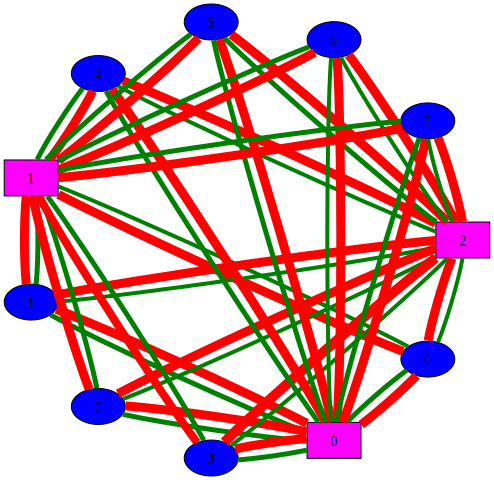

In [180]:
model.plot_graph(0, q_of_periods * max_c)

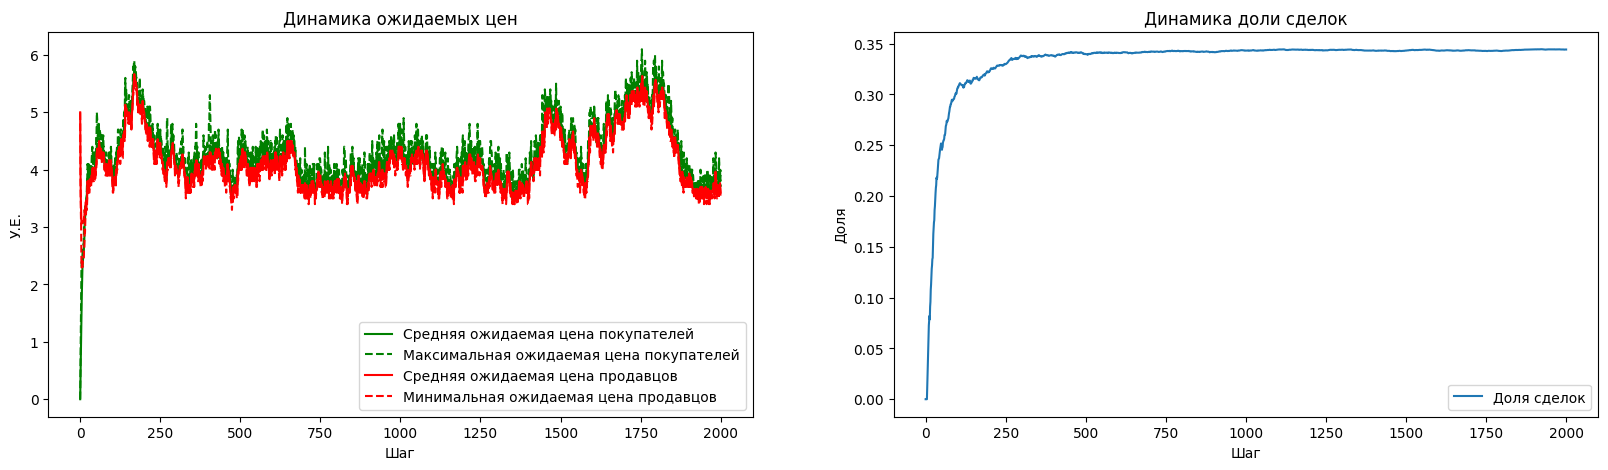

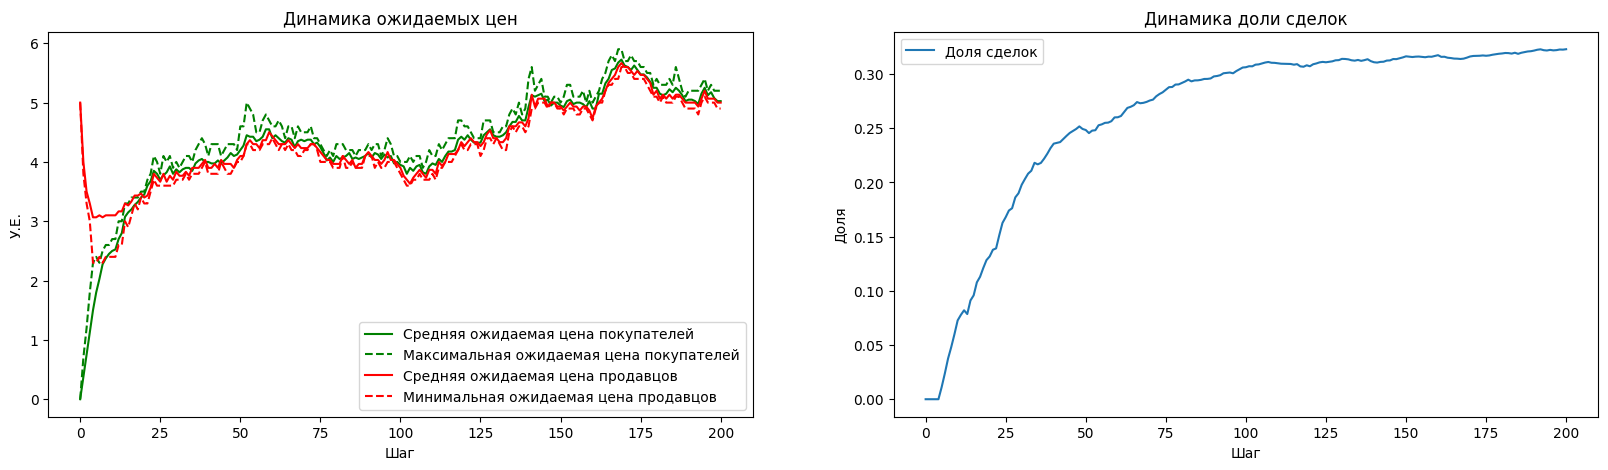

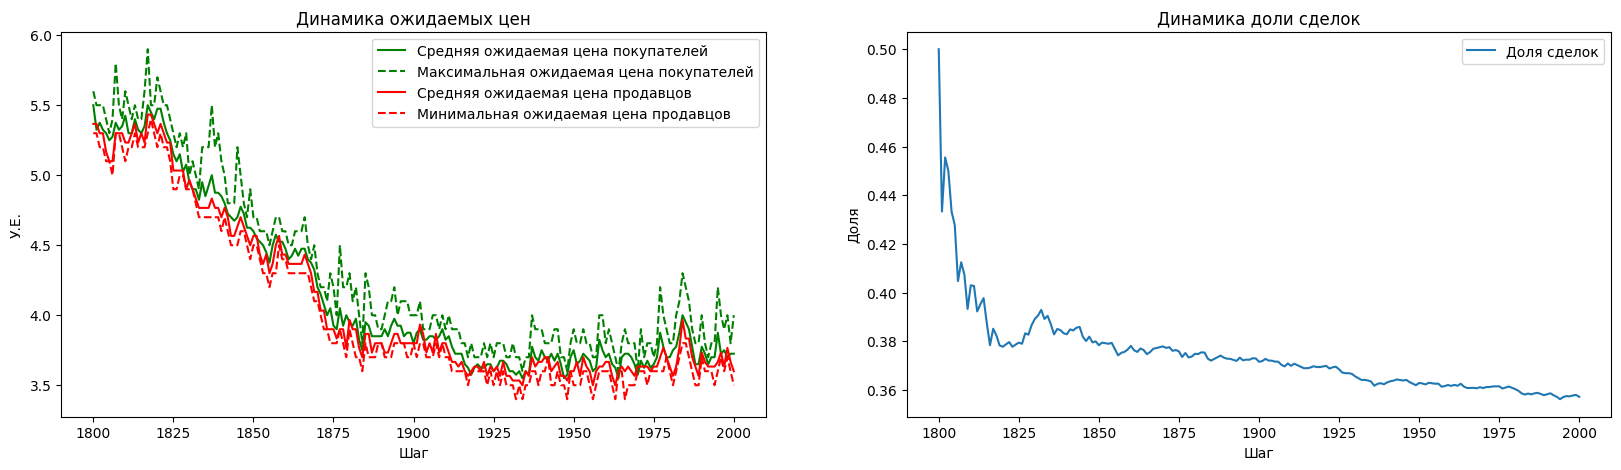

In [181]:
model.plot_dynamics(0, q_of_periods)
model.plot_dynamics(0, 200)
model.plot_dynamics(1800, 2000)

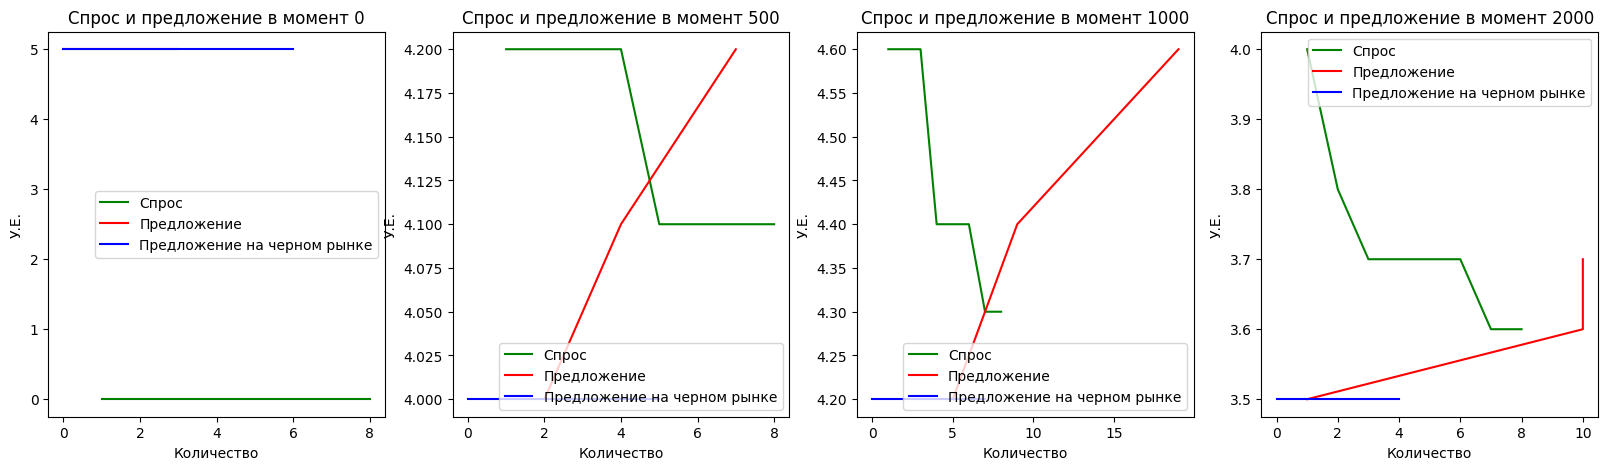

In [182]:
model.plot_supply_and_demand([0, 500, 1000, 2000])

Можно заметить, что за счет появления черного рынка, производителям приходится опускать ожидаемые цены на более низкие уровни, ведь иначе получается так, что значимая часть рынка обслуживается "черным предложением". Потребители, в свою очередь, наоборот - не поднимают свои ожидаемые цены высоко, поскольку знают, что какую-то часть потребностей может обслужить черный рынок. Таким образом, по сравнению с моделью 3, средние цены сделок оказываются ниже. Высокая волатильность ожидаемых цен по-прежнему сохраняется, а доля сделок, которая совершается за счет "белого рынка" оказывается ниже.